# Animation tutorial
Tutorial based on course materials and [stack-overflow thread](https://stackoverflow.com/a/29834816/7058273).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

<IPython.core.display.Javascript object>


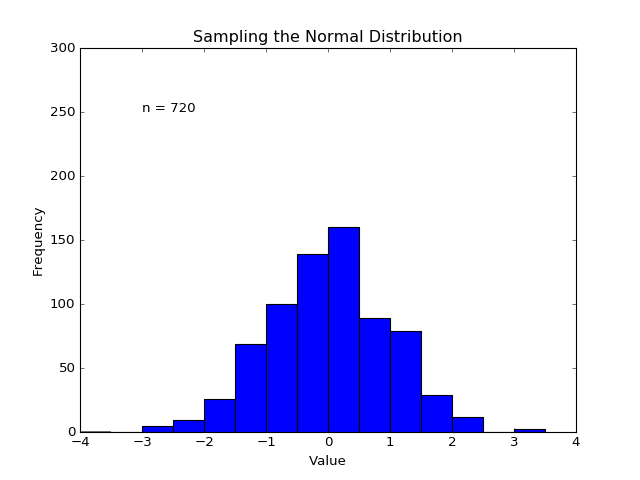

In [6]:
""""
Basic plot animation, single plot.
Understanding update funtion.
FuncAnimation is updating internal counter by one or 
by interator passed as argument.
Each frame is incrementing counter that is passed to update function.
"""

n = 1000
x = np.random.randn(n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):

    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,300])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [-3, 250])
    
fig = plt.figure()
rng = range(0,1001, 10)
a = animation.FuncAnimation(fig, update, frames=rng, interval=100, repeat=False)

<IPython.core.display.Javascript object>


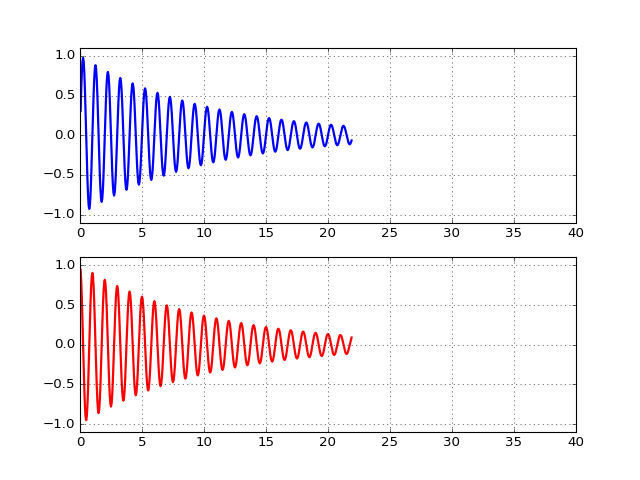

In [8]:
"""
Double plot example.
Creating and manipulating sublplots. 
"""
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t) * np.exp(-t/10.)
        y2 = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y1, y2

data_gen.t = 0

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# the same axes initalizations as before (just now we do it for both of them)
for ax in [ax1, ax2]:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()

# initialize the data arrays 
xdata, y1data, y2data = [], [], []
def run(data):
    # update the data
    t, y1, y2 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)

    # axis limits checking. Same as before, just for both axes
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()